Featuring the following notebook:
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
root_dir = '/kaggle/input/house-prices-advanced-regression-techniques/'
print(os.listdir('/kaggle/input/house-prices-advanced-regression-techniques/'))

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


In [3]:
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames :'''

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames :"

In [4]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
submit_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submit_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

<h1>Target Values</h1>

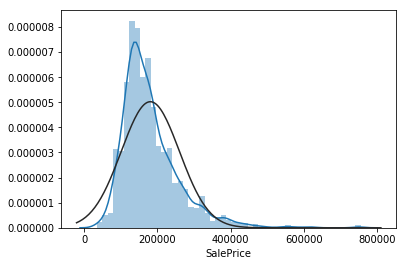

In [9]:
sns.distplot(train_df['SalePrice'], fit=norm)

In [10]:
mu, sigma = norm.fit(train_df['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 180921.20 and sigma = 79415.29



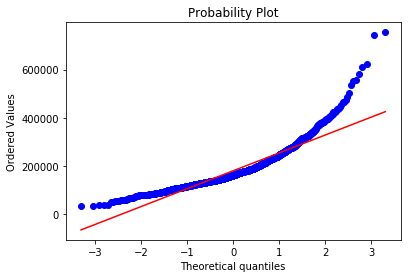

In [11]:
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot = plt)

In [12]:
#Category columnsの列を作成する。
#これらはcountplotで描画する
category_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 
                   'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
                   'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
                   'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                   'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                   'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                   'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
                   'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                   'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


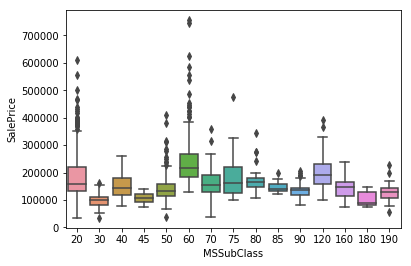

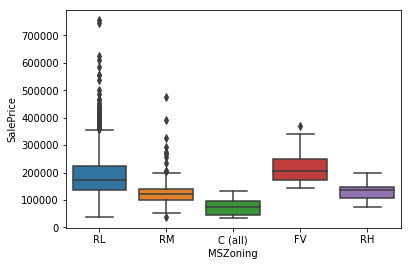

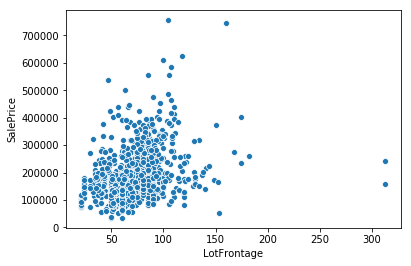

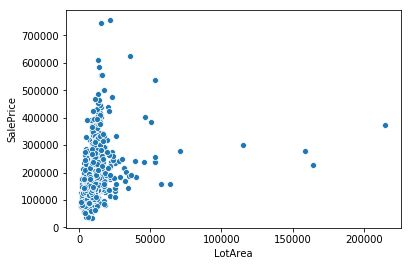

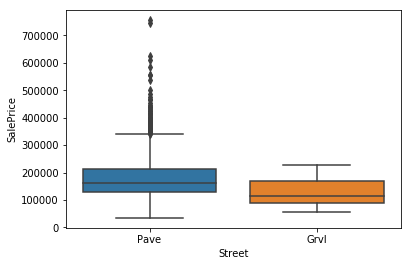

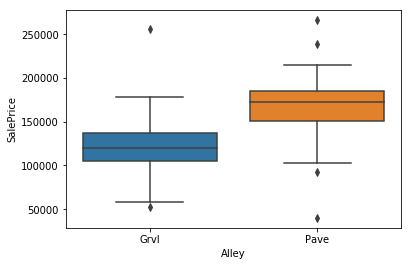

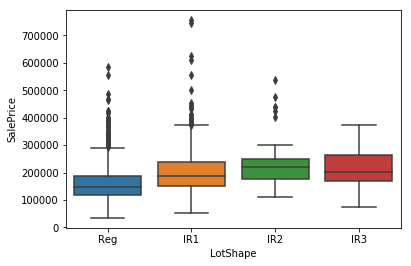

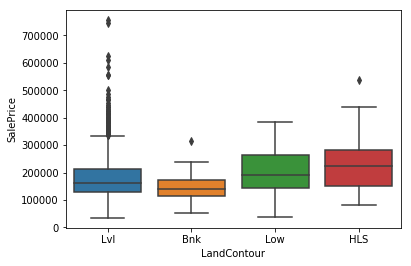

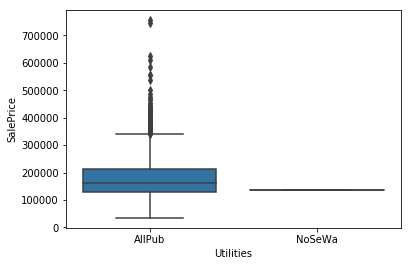

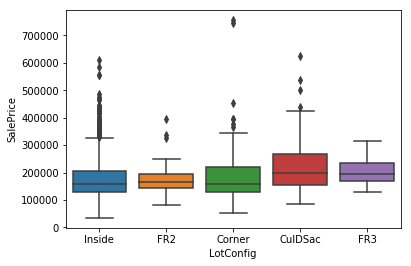

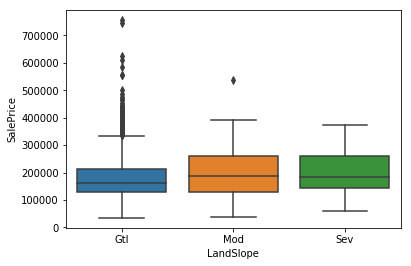

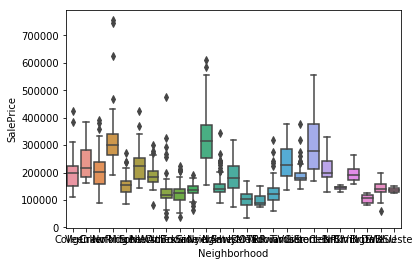

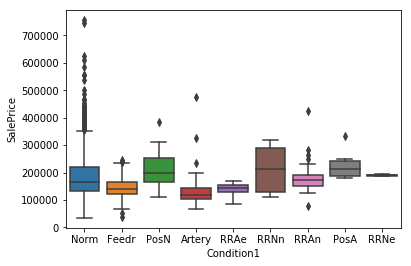

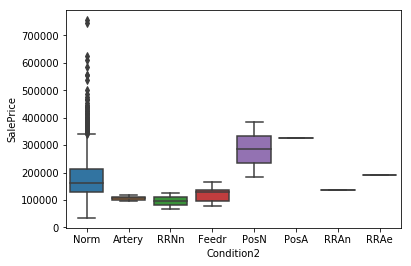

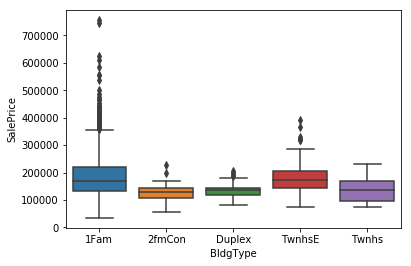

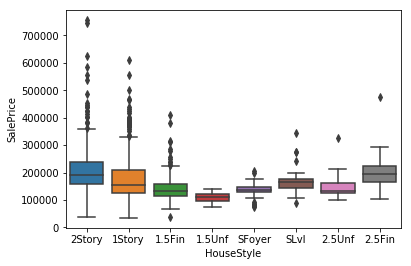

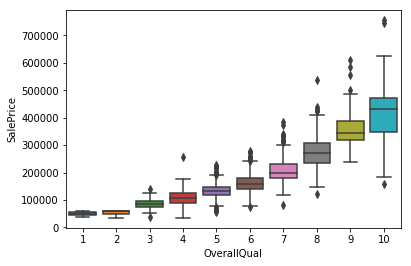

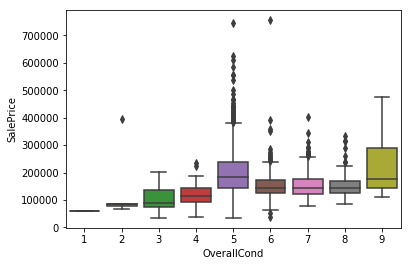

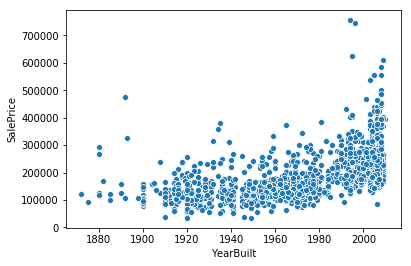

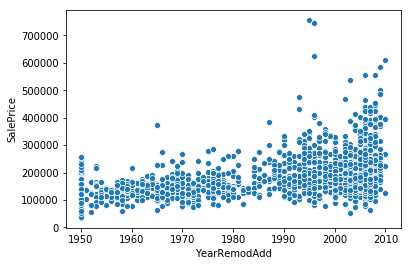

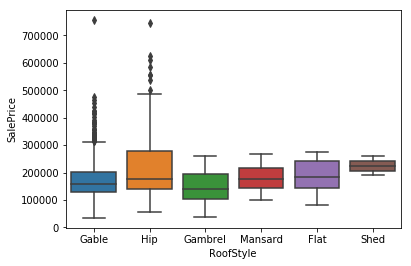

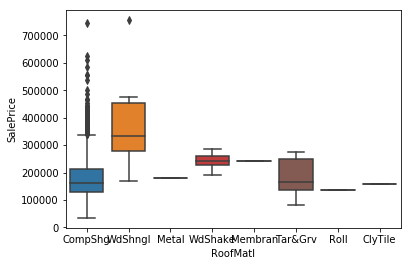

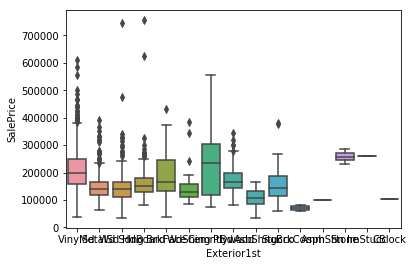

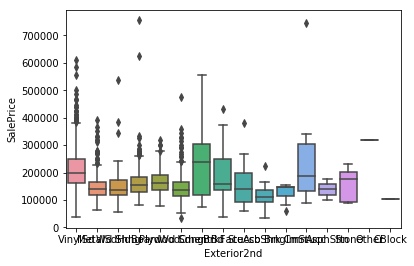

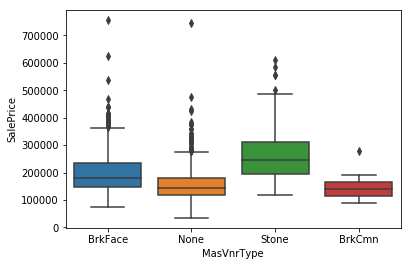

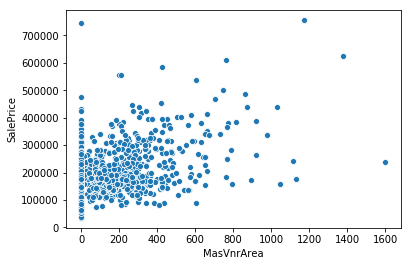

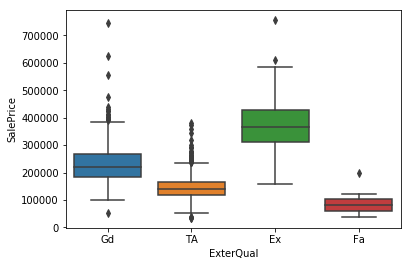

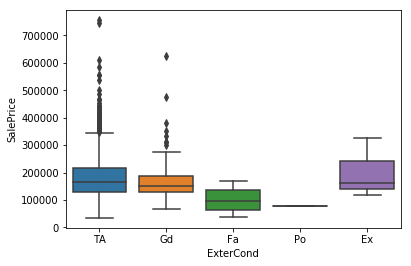

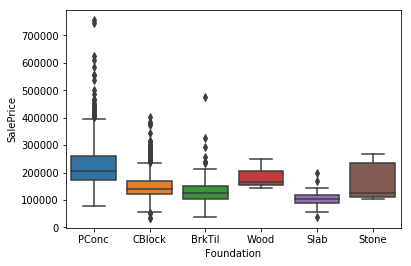

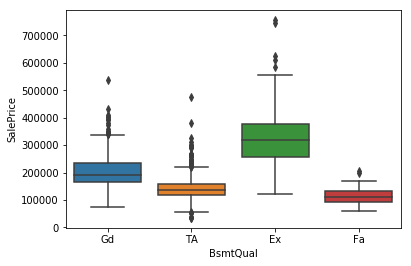

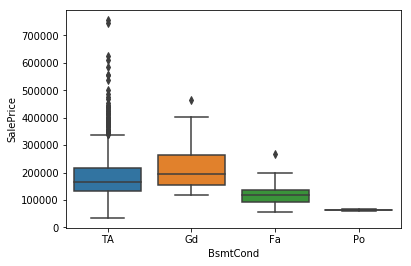

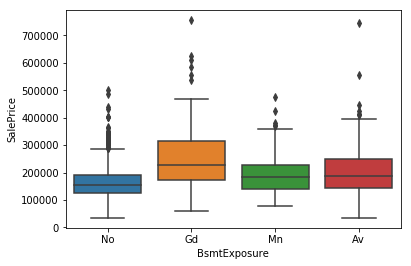

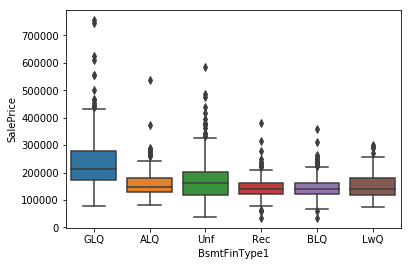

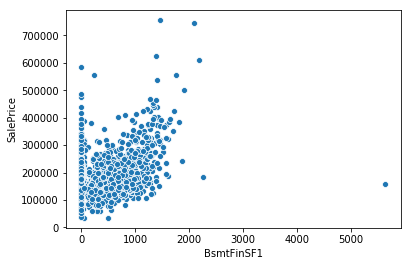

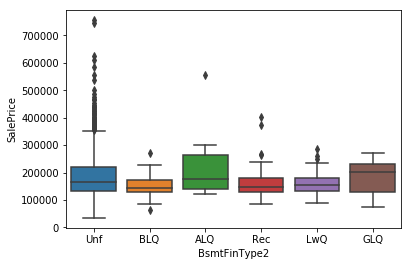

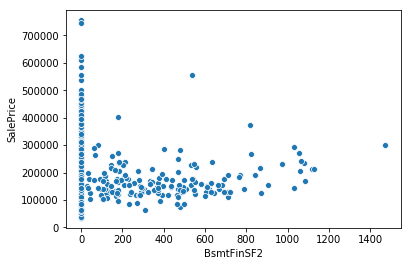

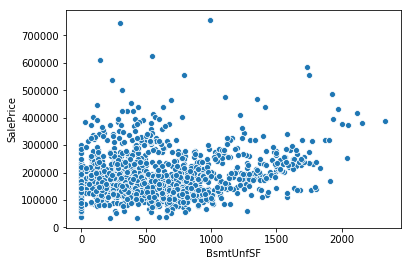

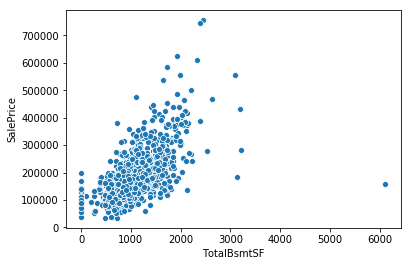

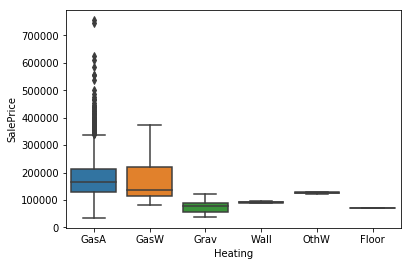

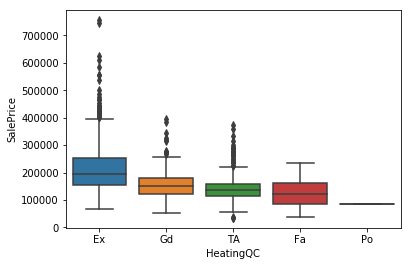

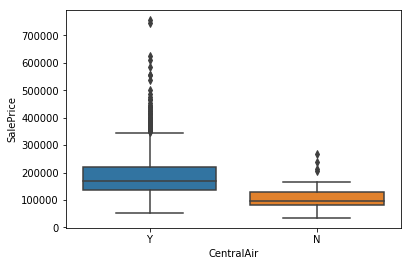

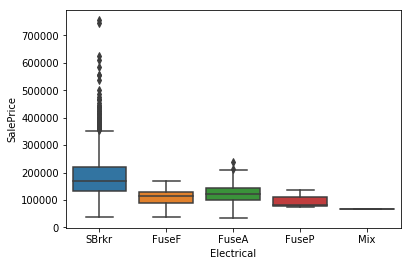

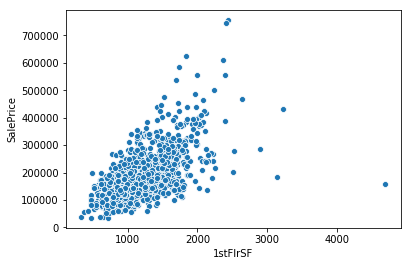

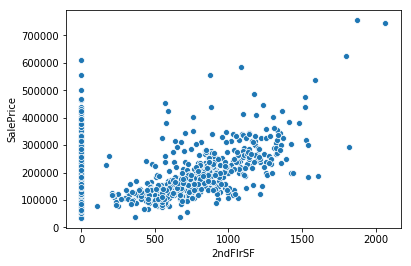

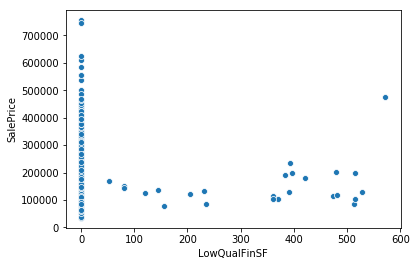

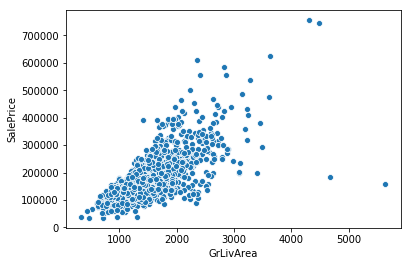

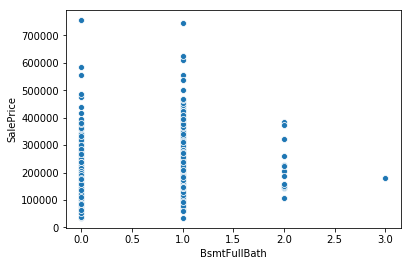

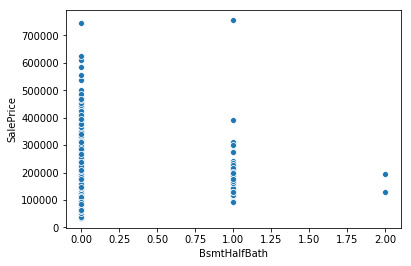

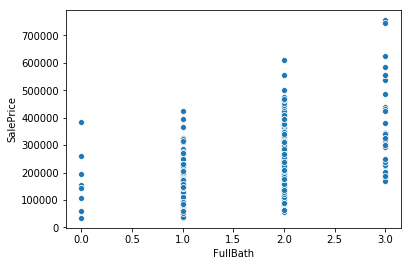

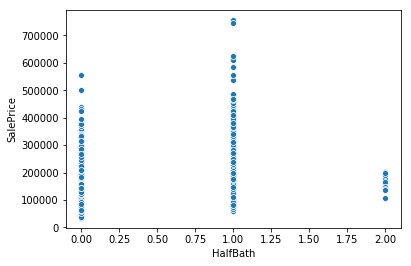

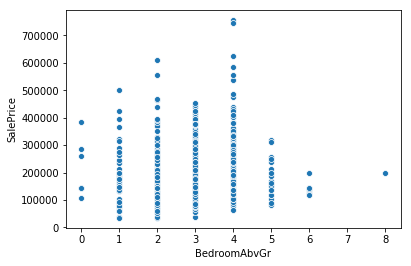

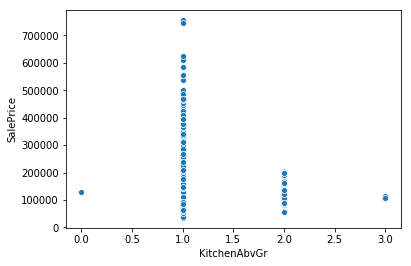

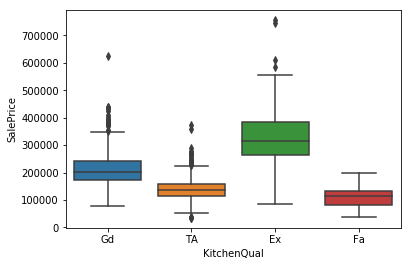

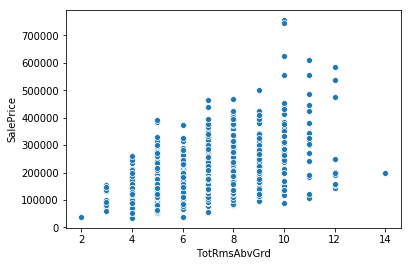

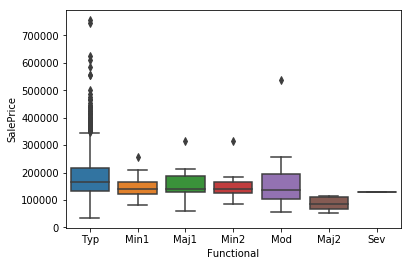

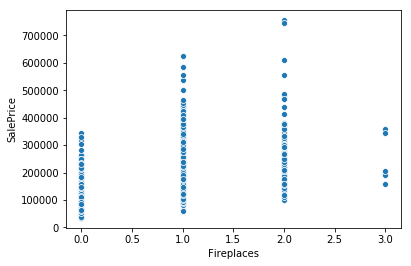

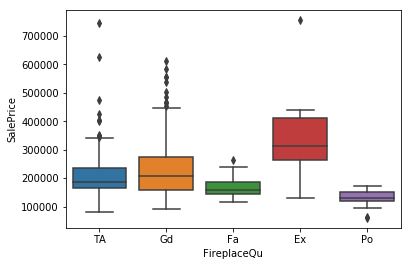

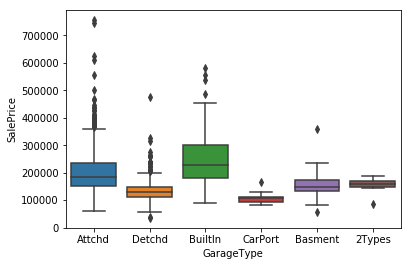

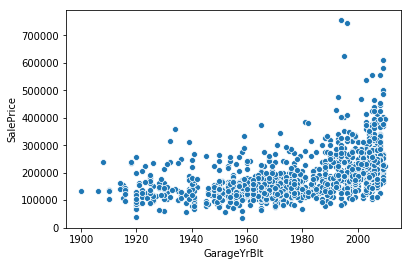

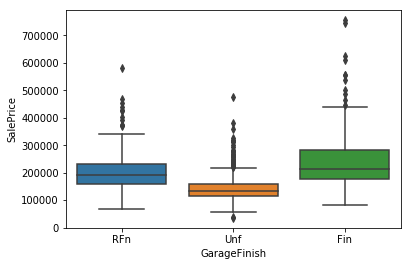

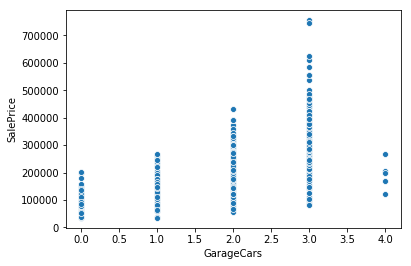

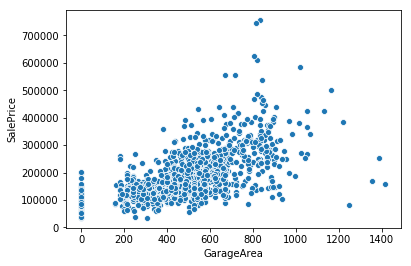

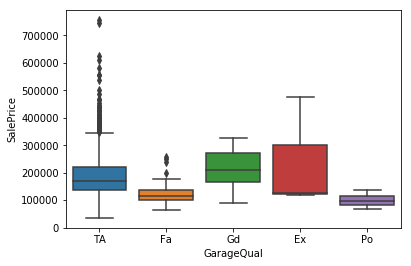

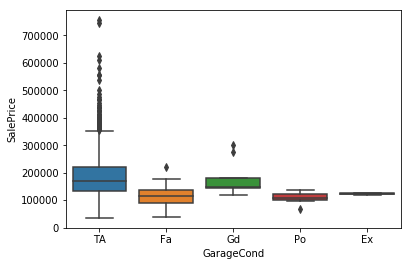

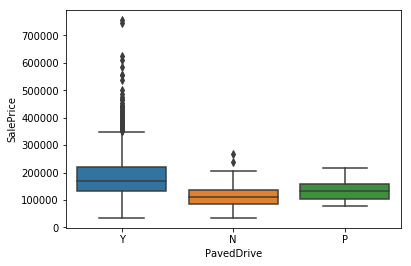

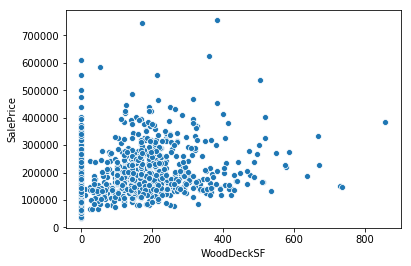

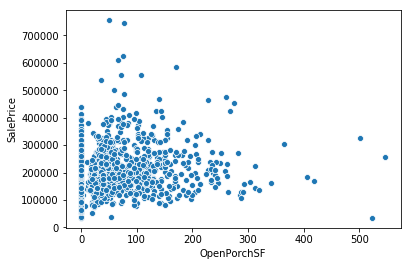

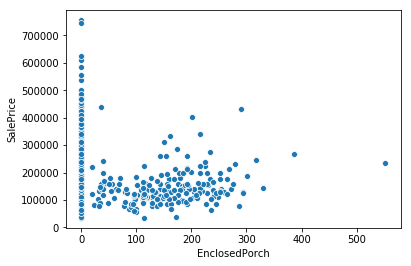

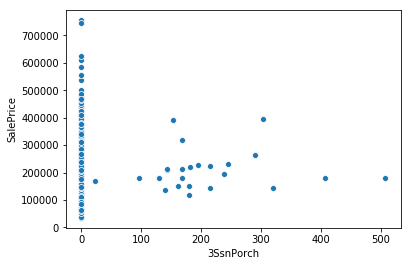

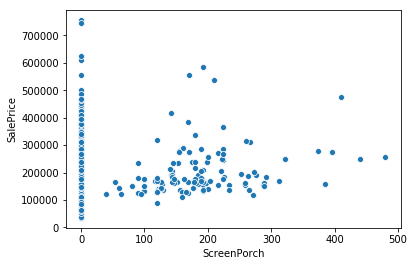

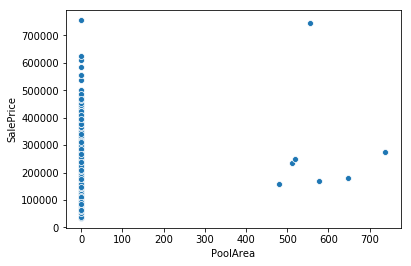

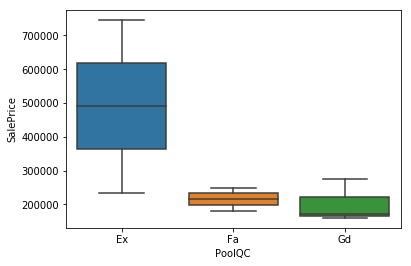

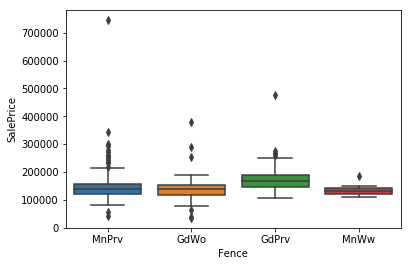

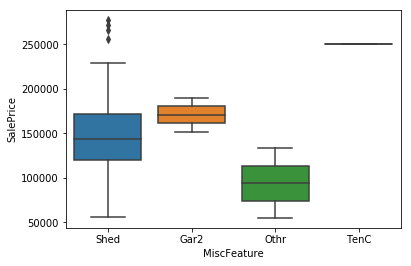

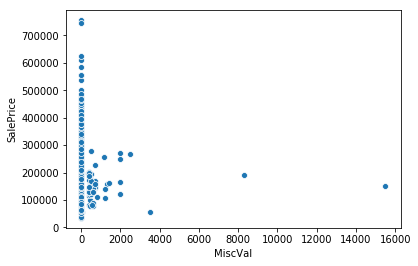

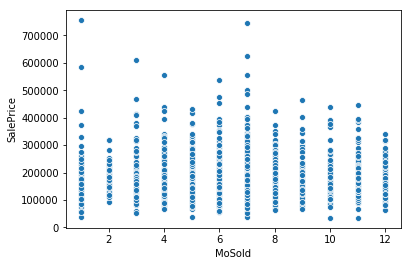

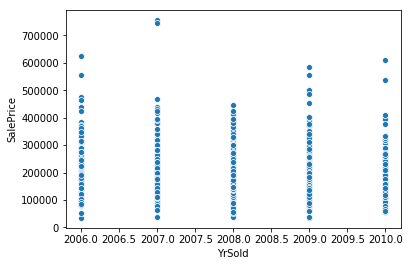

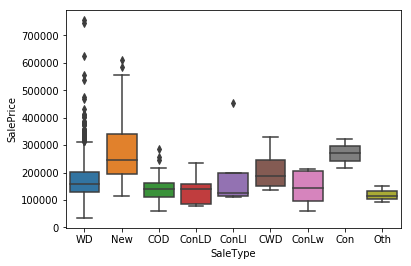

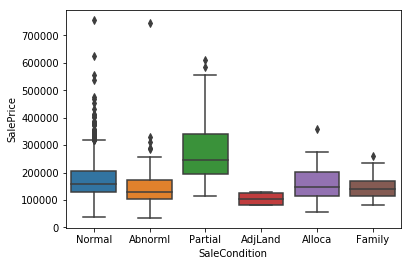

In [13]:
#
for col in train_df.columns[1:-1]:
    fig = plt.figure()
    #print(col)
    if col in category_columns:
        sns.boxplot(col, y='SalePrice', data=train_df)
    else:
        sns.scatterplot(col, y='SalePrice', data=train_df)


 mu = 12.02 and sigma = 0.40



/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "bext". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


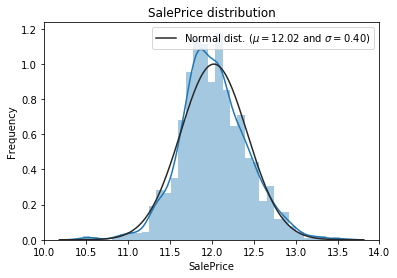

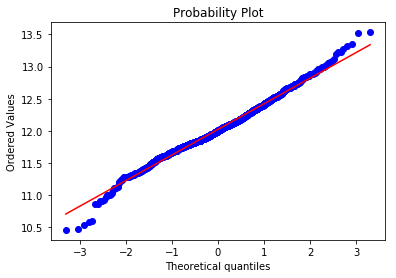

In [14]:
#歪度が右になっているものを正規分布の形に近づけるための変換
#log(x+1)をすることで変換する
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

sns.distplot(train_df['SalePrice'], fit=norm)

mu, sigma = norm.fit(train_df['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f} and $\sigma=${:.2f})'.format(mu, sigma)], 
          loc='bext')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

In [15]:
#数値とみなしても良さそうなカテゴリカラムの一覧
num_category_columns = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 
                        'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 
                        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 
                        'GarageCond', 'PavedDrive', 'PoolQC']

In [16]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


<h1>歪度の大きな数値カラムの歪度を直して正規分布に近づける</h1>

In [17]:
train_df.columns[-1]

'SalePrice'

In [18]:
#Create Numeric columns
numecic_columns = num_category_columns.copy()
for col in train_df.columns[:-1]:
    if col not in category_columns:
        numecic_columns.append(col)
numecic_columns

['Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [19]:
#LabelEncoding for numerical category columns
from sklearn.preprocessing import LabelEncoder
for col in num_category_columns:
    le = LabelEncoder()
    le.fit(np.unique(train_df[col].fillna('NA').unique().tolist()+test_df[col].fillna('NA').unique().tolist()))
    train_df[col] = le.transform(train_df[col].fillna('NA'))
    test_df[col] = le.transform(test_df[col].fillna('NA'))

In [20]:
stats.skew(train_df[numecic_columns].dropna())

array([-1.66509333e+01, -1.96802942e-01, -9.29723869e-01, -3.17125009e+00,
        0.00000000e+00,  5.21957038e+00,  2.87415143e-01,  8.45318100e-01,
       -1.78153332e+00, -2.74086427e+00, -4.71235035e-01, -2.94947789e+00,
       -9.88286685e-01,  6.49044509e-02, -3.23374474e+00,  5.68153883e-01,
       -3.85398458e+00, -5.73715745e-01, -3.85335465e+00,  3.54740506e-01,
       -7.69928091e-01, -4.04322497e+00, -5.09793297e+00, -3.85599615e+00,
       -1.61790339e+01,  1.86379399e-02,  2.24818324e+00,  1.55872201e+01,
       -6.17522401e-01, -5.64999324e-01,  2.70332112e+00,  1.93148812e+00,
        4.39346932e+00,  8.74601426e-01,  1.75256710e+00,  1.36195734e+00,
        8.06329978e-01,  1.00074097e+01,  1.54788621e+00,  5.68042922e-01,
        4.10237540e+00,  1.58006090e-02,  6.37323421e-01,  7.43277509e-02,
        4.81608628e+00,  7.22148938e-01,  6.42836022e-01, -6.40878945e-01,
        2.05741004e-01,  7.32911482e-01,  1.54771879e+00,  2.40070970e+00,
        3.16900267e+00,  

In [21]:
#Skewed Columns
skewed_features = train_df[numecic_columns].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
skew_df = pd.DataFrame(skewed_features, columns=['Skew'])
skew_df.head()

,Skew
Utilities,38.170678
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752


In [22]:
#歪度を直して正規分布に近づける
skew_df = skew_df[abs(skew_df) > 0.75]
print('There are {} skewed numerical features to Box Cos transform.'.format(skew_df.shape[0]))

from scipy.special import boxcox1p
lam = 0.15
for col in skew_df.index:
    train_df[col] = boxcox1p(train_df[col], lam)
    test_df[col] = boxcox1p(test_df[col], lam)

There are 59 skewed numerical features to Box Cos transform.


In [23]:
#colsはLabel Encodingが必要なもの。すなわち、文字列形式のカラムのもの。
#category扱いのカラムでなおかつ、
cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for col in cols:
    if col not in numecic_columns:
        le = LabelEncoder()
        le.fit(np.unique(train_df[col].fillna('NA').unique().tolist() + test_df[col].fillna('NA').unique().tolist()))
        
        print(col)
        train_df[col] = le.transform(train_df[col].fillna('NA'))
        test_df[col] = le.transform(test_df[col].fillna('NA'))

MSZoning
LotConfig
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Foundation
Heating
Electrical
GarageType
Fence
MiscFeature
SaleType
SaleCondition


In [24]:
#トレーニングデータとテストデータを作成
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df[['SalePrice']]
X_test = test_df.drop('Id', axis=1)

<h1>Label Encoding</h1>

数値の意味合いを持っているものを先にLabel Encodingにかけて、歪度を確認し、正規分布に近づけるように修正。その後、残りのカテゴリカラムをLabel Encodingにかける。

<h1>グラフ描画</h1>

<h1>モデル</h1>

In [25]:
from xgboost import XGBRegressor

In [26]:
model = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [27]:
model.fit(X_train, y_train)
predict = np.expm1(model.predict(X_test))

In [28]:
#np.log1pでlog(x+1)の変換をしたので、予測結果を逆関数で戻す
#predict_updated = np.expm1(predict)

In [29]:
submit_df['SalePrice'] = predict

In [30]:
submit_df.to_csv('result.csv', index=False)